In [1]:
# notebook setup
%matplotlib notebook
from __future__ import print_function
from matplotlib.pyplot import subplots

# SrFit example for a simple linear fit to a noisy data.

Simulate linear data with some random Gaussian noise and plot the generated "observed" data (xobs, yobs).

<IPython.core.display.Javascript object>


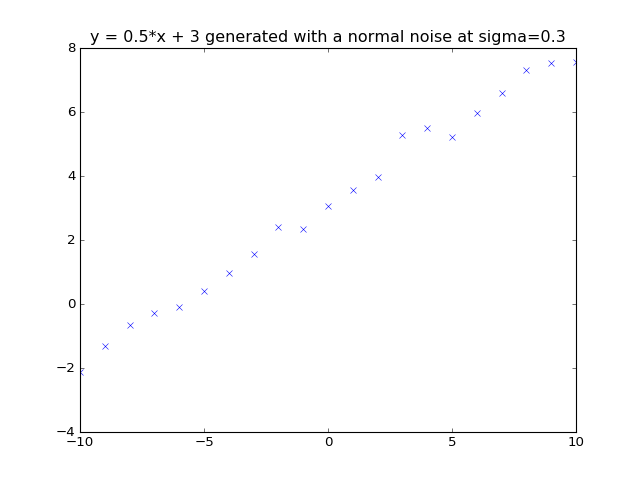

In [2]:
import numpy as np
xobs = np.arange(-10, 10.1)
dyobs = 0.3 * np.ones_like(xobs)
yobs = 0.5 * xobs + 3 + dyobs * np.random.randn(xobs.size)
fig1, ax1 = subplots()
ax1.plot(xobs, yobs, 'x')
ax1.set_title('y = 0.5*x + 3 generated with a normal noise at sigma=0.3');

We are going to define a line fitting regression using SrFit.
At first we create a SrFit Profile object that holds the observed data.

In [3]:
from diffpy.srfit.fitbase import Profile
linedata = Profile()
linedata.setObservedProfile(xobs, yobs, dyobs)

The second step is to create a FitContribution object, which associates observed profile with a mathematical model for the dependent variable.

In [4]:
from diffpy.srfit.fitbase import FitContribution
linefit = FitContribution('linefit')
linefit.setProfile(linedata)
linefit.setEquation("A * x + B")

 SrFit objects can be examined by calling their **show()** function.  SrFit
 parses the model equation and finds two parameters A, B at independent
 variable x.  The values of parameters A, B are at this stage undefined.


In [5]:
linefit.show()

Parameters
------------------------------------------------------------------------------
x   [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4
y   [-2.13907626 -1.31764291 -0.65942195 -0.26638785 -0.0840347   0.39498642
 
dy  [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.
A   None
B   None


We can set A and B to some specific values and calculate model
observations.  The x and y attributes of the FitContribution are 
the observed values, which may be re-sampled or truncated to a shorter 
fitting range.

In [6]:
linefit.A
linefit.A = 3
linefit.B = 5
print(linefit.A, linefit.A.value)
print(linefit.B, linefit.B.value)

Parameter(A) 3
Parameter(B) 5


`linefit.evaluate()` returns the modeled values and `linefit.residual()`,
the difference between observed and modeled data scaled by estimated
standard deviations.

linefit.evaluate() = [-25. -22. -19. -16. -13. -10.  -7.  -4.  -1.   2.   5.   8.  11.  14.  17.
  20.  23.  26.  29.  32.  35.]
linefit.residual() = [-76.20307912 -68.94119028 -61.13526016 -52.44537383 -43.05321767
 -34.64995472 -26.5868887  -18.59245826 -11.32809725  -1.10518714
   6.4830038   14.77352018  23.39334815  29.08863071  38.37762986
  49.21902777  56.81391728  64.71000667  72.24820032  81.52615165
  91.49361074]


<IPython.core.display.Javascript object>


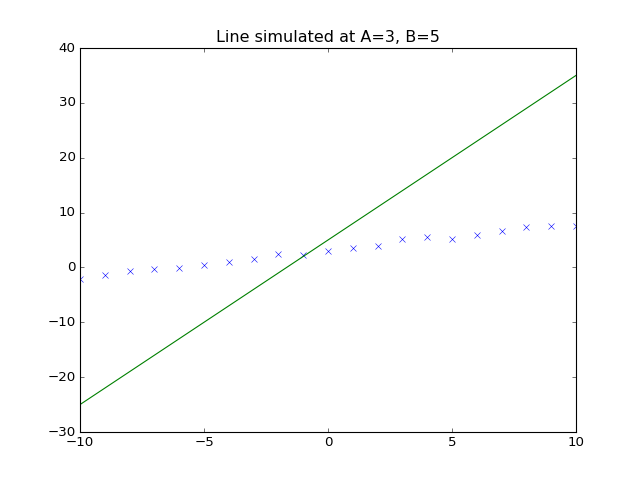

In [7]:
print("linefit.evaluate() =", linefit.evaluate())
print("linefit.residual() =", linefit.residual())
fig2, ax2 = subplots()
ax2.plot(xobs, yobs, 'x', linedata.x, linefit.evaluate(), '-')
ax2.set_title('Line simulated at A=3, B=5');

 We want to find the optimum model parameters that fit the simulated curve
 to the observations.  This is done by associating FitContribution with
 a FitRecipe object.  FitRecipe can manage multiple fit contributions and
 optimize all models to fit their respective profiles.

In [8]:
from diffpy.srfit.fitbase import FitRecipe
rec = FitRecipe()

The `clearFitHooks()` function suppresses printout of iteration numbers.  The `addContribution()` function includes the specified FitContribution in the FitRecipe, which acts as a top-level manager of all associated fits. 

In [9]:
rec.clearFitHooks()
rec.addContribution(linefit)
rec.show()

Parameters
------------------------------------------------------------------------------
linefit.x   [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2. 
linefit.y   [-2.13907626 -1.31764291 -0.65942195 -0.26638785 -0.0840347   0.39
linefit.dy  [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 
linefit.A   3
linefit.B   5


 FitContributions may have many parameters.  We need to tell the recipe
 which of them should be controlled and potentially optimized in a fit.

In [10]:
rec.addVar(rec.linefit.A);
rec.addVar(rec.linefit.B);

 The call of the addVar function also created two attributes A and B for the rec object,
 which link to the A and B parameters of the linefit contribution.


In [11]:
print("rec.A =", rec.A)
print("rec.A.value =", rec.A.value)

rec.A = ParameterProxy(A)
rec.A.value = 3


 The names of the declared variables are stored in the `rec.names` attribute
 and the corresponding values in `rec.values`.

In [12]:
print("rec.values =", rec.values)
print("rec.names =", rec.names)

rec.values = [3 5]
rec.names = ['A', 'B']


 Finally the recipe objects provides a residual() function to calculate
 the difference between the observed and simulated values.  The residual
 function can accept a list of new variable values in the same order as
 rec.names.

In [13]:
print("rec.residual() =", rec.residual())
print("rec.residual([2, 4]) =", rec.residual([2, 4]))

rec.residual() = [-76.20307912 -68.94119028 -61.13526016 -52.44537383 -43.05321767
 -34.64995472 -26.5868887  -18.59245826 -11.32809725  -1.10518714
   6.4830038   14.77352018  23.39334815  29.08863071  38.37762986
  49.21902777  56.81391728  64.71000667  72.24820032  81.52615165
  91.49361074]
rec.residual([2, 4]) = [-46.20307912 -42.27452362 -37.80192683 -32.44537383 -26.386551
 -21.31662139 -16.5868887  -11.92579159  -7.99476391  -1.10518714
   3.14967046   8.10685351  13.39334815  15.75529738  21.71096319
  29.21902777  33.48058394  38.04334     42.24820032  48.19281832
  54.82694407]


The FitRecipe.residual function can be directly used with the scipy
leastsq function for minimizing a sum of squares.

In [14]:
from scipy.optimize import leastsq
leastsq(rec.residual, rec.values)

(array([ 0.49671468,  3.08448086]), 3)

 Recipe variables and the linked line-function parameters are set to the
 new optimized values.

In [15]:
print(rec.names, "-->", rec.values)
linefit.show()

['A', 'B'] --> [ 0.49671468  3.08448086]
Parameters
------------------------------------------------------------------------------
x   [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4
y   [-2.13907626 -1.31764291 -0.65942195 -0.26638785 -0.0840347   0.39498642
 
dy  [ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.
A   0.496714681297
B   3.08448085714


 The calculated function is available in the `ycalc` attribute of the profile.
 It can be also accessed from the `linefit` contribution attribute of the
 recipe as `rec.linefit.profile.ycalc`.

<IPython.core.display.Javascript object>


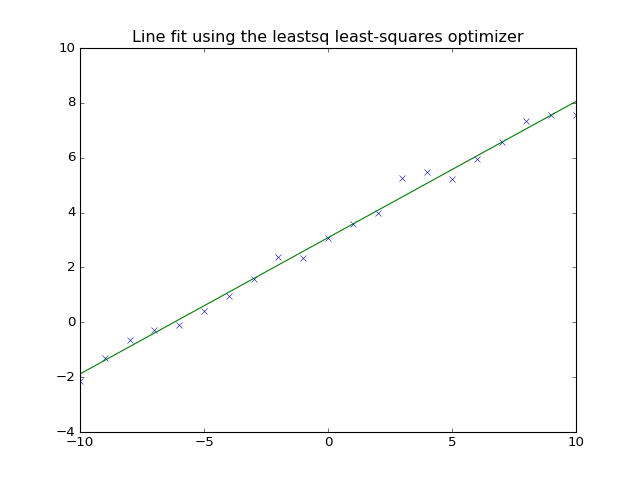

In [16]:
fig3, ax3 = subplots()
ax3.plot(linedata.x, linedata.y, 'x', linedata.x, linedata.ycalc, '-')
ax3.set_title('Line fit using the leastsq least-squares optimizer');

The `FitRecipe.scalarResidual()` function returns the sum of squares and can
be used with a minimizer that requires a scalar function:

Optimization terminated successfully.
         Current function value: 16.760912
         Iterations: 49
         Function evaluations: 95
['A', 'B'] --> [ 0.49671717  3.08452702]


<IPython.core.display.Javascript object>


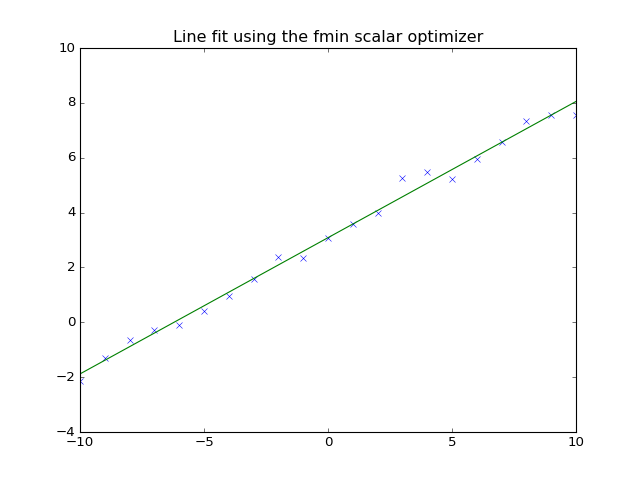

In [17]:
from scipy.optimize import fmin
fmin(rec.scalarResidual, [1, 1])
print(rec.names, "-->", rec.values)
fig4, ax4 = subplots()
ax4.plot(linedata.x, linedata.y, 'x', linedata.x, linedata.ycalc, '-')
ax4.set_title('Line fit using the fmin scalar optimizer');

For a converged fit recipe, the details of the fit can be extracted
 with the FitResults class.

In [18]:
from diffpy.srfit.fitbase import FitResults
res = FitResults(rec)
print(res)

Overall
------------------------------------------------------------------------------
Residual       16.76091226
Contributions  16.76091226
Restraints     0.00000000
Chi2           16.76091226
Reduced Chi2   0.88215328
Rw             0.06209053

Variables
------------------------------------------------------------------------------
A  4.96717165e-01 +/- 1.08112495e-02
B  3.08452702e+00 +/- 6.54653668e-02

Variable Correlations greater than 25%
------------------------------------------------------------------------------
No correlations greater than 25%



Variables defined in the recipe can be fixed to a constant value.

In [19]:
rec.fix(B=0)

The fixed variables can be checked using the "fixednames" and
 "fixedvalues" attributes of a recipe.

In [20]:
print("free:", rec.names, "-->", rec.names)
print("fixed:", rec.fixednames, "-->", rec.fixedvalues)

free: ['A'] --> ['A']
fixed: ['B'] --> [0]


The fit can be rerun with a constant variable B.

Overall
------------------------------------------------------------------------------
Residual       2236.69941565
Contributions  2236.69941565
Restraints     0.00000000
Chi2           2236.69941565
Reduced Chi2   111.83497078
Rw             0.71726621

Variables
------------------------------------------------------------------------------
A  4.96714681e-01 +/- 1.08112495e-02

Fixed Variables
------------------------------------------------------------------------------
B  0.00000000e+00

Variable Correlations greater than 25%
------------------------------------------------------------------------------
No correlations greater than 25%



<IPython.core.display.Javascript object>


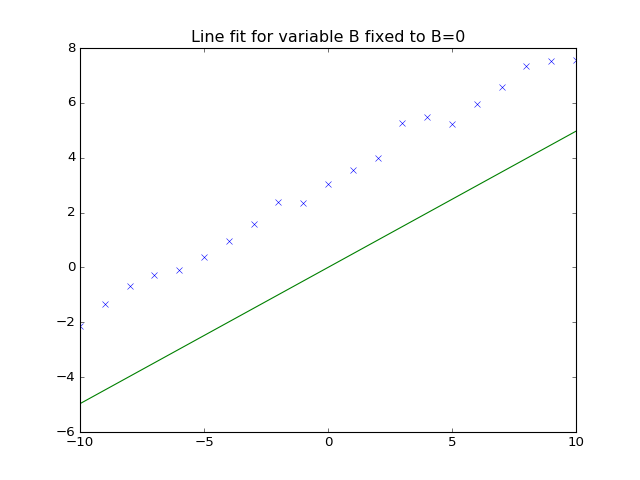

In [21]:
leastsq(rec.residual, rec.values)
print(FitResults(rec))
fig5, ax5 = subplots()
ax5.plot(linedata.x, linedata.y, 'x', linedata.x, linedata.ycalc, '-')
ax5.set_title('Line fit for variable B fixed to B=0');

Fixed variables may be released with the `free()` function.
 Calling it as `free("all")` releases all fixed variables.

In [22]:
rec.free('all')

Variables may be constrained to a result of an expression.

In [23]:
rec.constrain(rec.A, "2 * B")

Perform linear fit where the slope value must be two times the offset.

Overall
------------------------------------------------------------------------------
Residual       1880.89014689
Contributions  1880.89014689
Restraints     0.00000000
Chi2           1880.89014689
Reduced Chi2   94.04450734
Rw             0.65774609

Variables
------------------------------------------------------------------------------
B  2.67563594e-01 +/- 5.38729023e-03

Variable Correlations greater than 25%
------------------------------------------------------------------------------
No correlations greater than 25%



<IPython.core.display.Javascript object>


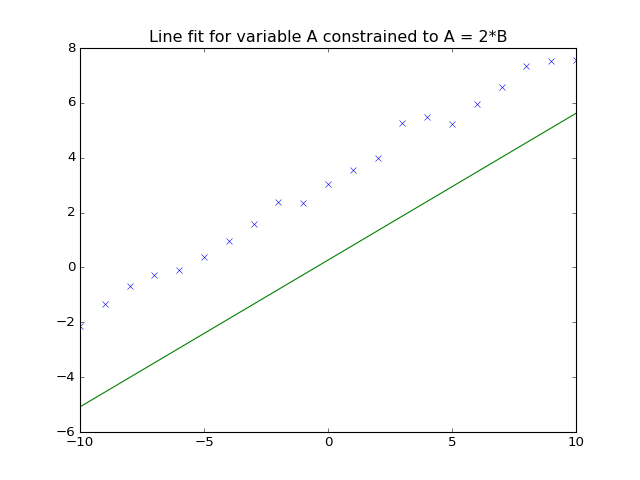

In [24]:
leastsq(rec.residual, rec.values)
print(FitResults(rec))
fig6, ax6 = subplots()
ax6.plot(linedata.x, linedata.y, 'x', linedata.x, linedata.ycalc, '-')
ax6.set_title('Line fit for variable A constrained to A = 2*B');

Constraint expressions can be removed by calling the unconstrain function.

In [25]:
rec.unconstrain(rec.A)

 Variables may be restrained to a specific range.  Here "ub" is the upper
 boundary and "sig" acts as a standard deviation for ((x - ub)/sig)**2
 penalty function.

In [26]:
arst = rec.restrain(rec.A, ub=0.2, sig=0.001)

Perform fit with the line slope restrained to a maximum value of 0.2:

Overall
------------------------------------------------------------------------------
Residual       763.59900360
Contributions  757.26359182
Restraints     6.33541179
Chi2           757.26359182
Reduced Chi2   37.86317959
Rw             0.41734970

Variables
------------------------------------------------------------------------------
A  2.02517024e-01 +/- 9.95749472e-04
B  3.08448086e+00 +/- 6.54653672e-02

Variable Correlations greater than 25%
------------------------------------------------------------------------------
No correlations greater than 25%



<IPython.core.display.Javascript object>


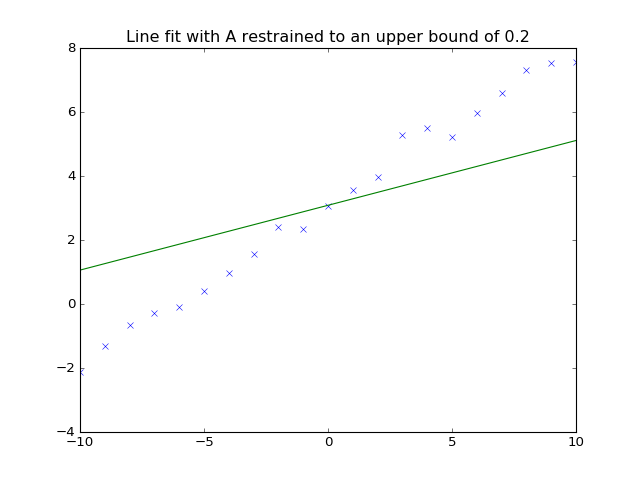

In [27]:
leastsq(rec.residual, rec.values)
print(FitResults(rec))
fig7, ax7 = subplots()
ax7.plot(linedata.x, linedata.y, 'x', linedata.x, linedata.ycalc, '-')
ax7.set_title('Line fit with A restrained to an upper bound of 0.2');